In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np, crocoddyl, random; crocoddyl.switchToNumpyArray()
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

In [2]:
starting_configurations, linear_velocity, angular_velocity, value_func = [], [], [], []    
iters = []

for _ in range(30000):
    initial_config = [random.uniform(-1.99, 1.99), random.uniform(-1.99, 1.99), 0]            
    model = crocoddyl.ActionModelUnicycle()

    model.costWeights = np.matrix([1, 0.3]).T

    problem = crocoddyl.ShootingProblem(np.matrix(initial_config).T, [ model ] * 20, model)
    ddp = crocoddyl.SolverDDP(problem)
    ddp.solve([], [], 1000)
    ddp.xs[0]
    starting_configurations.append(ddp.xs[0])
    linear_velocity.append(ddp.us[0][0])
    angular_velocity.append(ddp.us[0][0])
    value_func.append(sum(d.cost for d in ddp.datas()))
    iters.append(ddp.iter)

starting_configurations = np.squeeze(np.array(starting_configurations))
x = starting_configurations[0:,0]
y = starting_configurations[0:,1]
#z = value_func
#z = angular_velocity
z = linear_velocity


In [ ]:
plt.rcParams["figure.figsize"] = 12.8, 9.6
crocoddyl.switchToNumpyArray()
cmap = plt.get_cmap('jet')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("X Positions")
ax.set_ylabel("Y Positions")
ax.set_zlabel("Linear Velocity")
ax.set_xlim([-2., 2.])
ax.set_ylim([-2., 2])
ax.scatter3D(x, y, z )
ax.plot_trisurf(x, y, value_func, cmap='BrBG', linewidth= 1)
ax.view_init(elev=30)

plt.show()

/home/a/miniconda/envs/deep_net/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: linewidths is ignored by contourf
  
/home/a/miniconda/envs/deep_net/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: The following kwargs were not used by contour: 's'
  


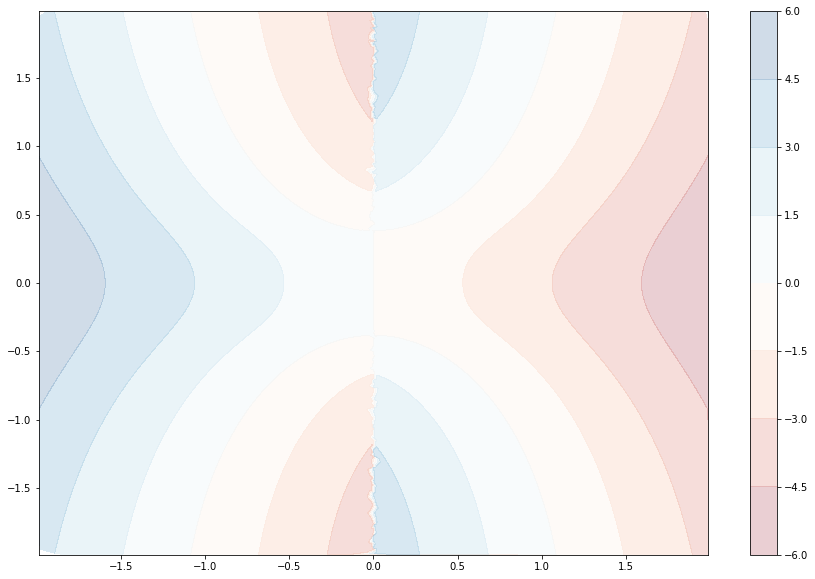

In [3]:
plt.figure(figsize=(15, 10))
plt.tricontourf(x,y,linear_velocity, alpha=.2,s=70,linewidths=0, cmap='RdBu')

plt.colorbar()
plt.axis(aspect='image');


/home/a/miniconda/envs/deep_net/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: linewidths is ignored by contourf
  if __name__ == '__main__':
/home/a/miniconda/envs/deep_net/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: The following kwargs were not used by contour: 's'
  if __name__ == '__main__':


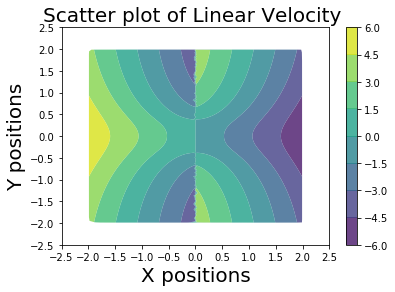

In [4]:
fig2, ax2 = plt.subplots()
ax2.set_aspect('auto')
fig2.set_facecolor('white')
ax2.set_xlim(-2.5, 2.5)
ax2.set_ylim(-2.5, 2.5)
ax2.xaxis.set_major_locator(plt.MultipleLocator(0.5))
ax2.yaxis.set_major_locator(plt.MultipleLocator(0.5))

tcf = ax2.tricontourf(x, y, linear_velocity,s = 100, alpha = 0.8, linewidths = 0,linestyles = 'dotted',antialiased=True)
tcf.autoscale()
fig2.colorbar(tcf)

ax2.set_title('Density plot')
ax2.set_xlabel('X positions', fontsize = 20)
ax2.set_ylabel('Y positions', fontsize = 20)
ax2.set_title("Scatter plot of Linear Velocity ", fontsize = 20)
plt.axis(aspect='image');
plt.show()

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
value_func = np.array(value_func)
N = int(len(value_func)**.5)
z = value_func.reshape(N, N)
plt.imshow(z, extent=(np.amin(x), np.amax(x), np.amin(y), np.amax(y)), cmap = 'hsv', alpha = 0.8, filternorm=False)
plt.colorbar()
plt.show()

ValueError: cannot reshape array of size 30000 into shape (173,173)

In [ ]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kde
 
# create data
x = np.random.normal(size=500)
y = x * 3 + np.random.normal(size=500)
 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=300
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Make the plot
plt.pcolormesh(xi, yi, zi.reshape(xi.shape))
plt.show()
 
# Change color palette
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Greens_r)
plt.show()


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=
    go.Contour(
        z=[[10, 10.625, 12.5, 15.625, 20],
           [5.625, 6.25, 8.125, 11.25, 15.625],
           [2.5, 3.125, 5., 8.125, 12.5],
           [0.625, 1.25, 3.125, 6.25, 10.625],
           [0, 0.625, 2.5, 5.625, 10]],
        # heatmap gradient coloring is applied between each contour level
        contours_coloring='heatmap',
        line_width=0# can also be 'lines', or 'none'
    )
)

fig.show()

In [ ]:
z.shape

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Load data from CSV
#dat = np.genfromtxt('dat.xyz', delimiter=' ',skip_header=0)
X_dat = dat[:,0]
Y_dat = dat[:,1]
Z_dat = dat[:,2]

# Convert from pandas dataframes to numpy arrays
X, Y, Z, = np.array([]), np.array([]), np.array([])
for i in range(len(X_dat)):
        X = np.append(X, X_dat[i])
        Y = np.append(Y, Y_dat[i])
        Z = np.append(Z, Z_dat[i])

# create x-y points to be used in heatmap
xi = np.linspace(X.min(), X.max(), 1000)
yi = np.linspace(Y.min(), Y.max(), 1000)

# Z is a matrix of x-y values
zi = griddata((X, Y), Z, (xi[None,:], yi[:,None]), method='cubic')

# I control the range of my colorbar by removing data 
# outside of my range of interest
zmin = 3
zmax = 12
zi[(zi<zmin) | (zi>zmax)] = None

# Create the contour plot
CS = plt.contourf(xi, yi, zi, 15, cmap=plt.cm.rainbow,
                  vmax=zmax, vmin=zmin)
plt.colorbar()  
plt.show()

In [ ]:
starting_configurations, linear_velocity, angular_velocity, value_func = [], [], [], []    
iters = []

for _ in range(10000):
    initial_config = [random.uniform(-1.99, 1.99), random.uniform(-1.99, 1.99), 0]            
    model = crocoddyl.ActionModelUnicycle()

    model.costWeights = np.matrix([1, 0.3]).T

    problem = crocoddyl.ShootingProblem(np.matrix(initial_config).T, [ model ] * 20, model)
    ddp = crocoddyl.SolverDDP(problem)
    ddp.solve([], [], 1000)
    ddp.xs[0]
    starting_configurations.append(ddp.xs[0])
    linear_velocity.append(ddp.us[0][0])
    angular_velocity.append(ddp.us[0][0])
    value_func.append(sum(d.cost for d in ddp.datas()))
    iters.append(ddp.iter)

starting_configurations = np.squeeze(np.array(starting_configurations))
x = starting_configurations[0:,0]
y = starting_configurations[0:,1]